In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import scipy
import json
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from scipy.stats import ttest_ind
from scipy.stats import gaussian_kde
plt.style.use('default')
plt.style.use('seaborn-v0_8-paper')
warm = sns.color_palette("YlOrRd")  # 或者 "hot"
custom_colors = [sns.color_palette()[0],sns.color_palette()[3]]

数据汇总

In [2]:
gptdata = pd.read_csv('gptdata.csv',index_col=0)
per_gptdata = pd.read_csv('per_gptdata.csv')
humandata = pd.read_csv('humandata.csv')
humandata['id'] += (np.max(gptdata['id'])+1)
humandata['t'] = 100
# 按照相同列名合并dataframe
# 找到两个数据框中都存在的列
common_columns = per_gptdata.columns.intersection(humandata.columns)

# 只合并这些列
fulldata = pd.concat([per_gptdata[common_columns], humandata[common_columns]], axis=0,ignore_index=True)
fulldata.to_csv('fulldata.csv')

In [6]:
per_gptdata['agent'] = per_gptdata['agent'].replace('per_gpt','gpt')

c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

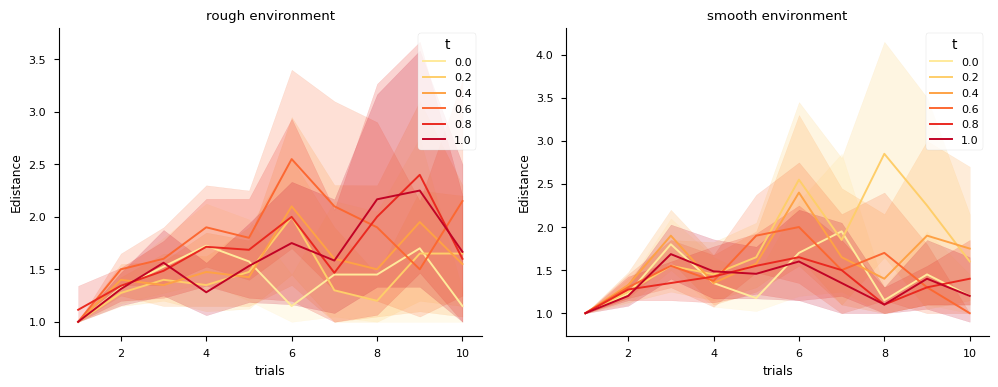

In [13]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
envs = ['rough','smooth']
for i in range(len(envs)):
    ax = axes[i]
    env = envs[i]
    sns.lineplot(x='trials',y='Edistance',hue='t',data=per_gptdata[(per_gptdata.environment == env) & (per_gptdata.Edistance >-1)],ax=ax,palette=warm)
    ax.set_title(env+' environment')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

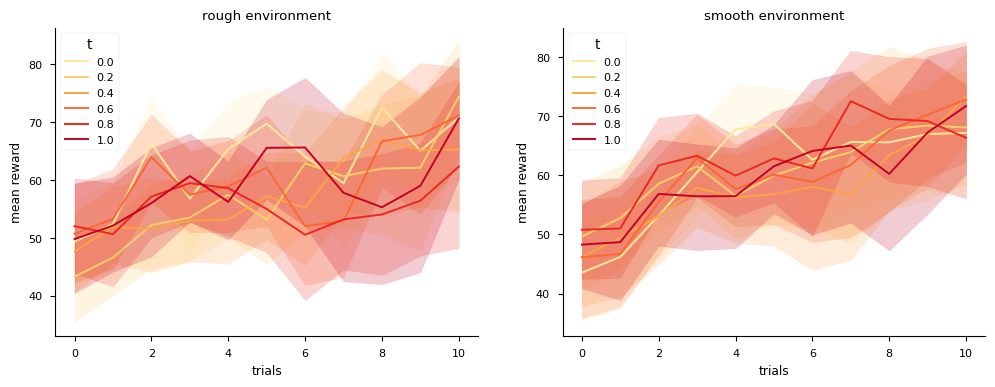

In [11]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
envs = ['rough','smooth']
for i in range(len(envs)):
    ax = axes[i]
    env = envs[i]
    sns.lineplot(x='trials',y='z',hue='t',data=per_gptdata[per_gptdata.environment == env],ax=ax,palette=warm)
    ax.set_title(env+' environment')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel('mean reward')

### 步长分析

In [290]:
randomdata = pd.read_csv('../model/random_walk.csv',index_col=0)
randomdata = randomdata[randomdata.Edistance > -1]

In [291]:
disdata = fulldata[fulldata.Edistance > -1]
disdata = disdata.groupby(['agent','id','environment','horizons'])['Edistance'].mean().reset_index()
disdata.to_csv('disdata.csv')

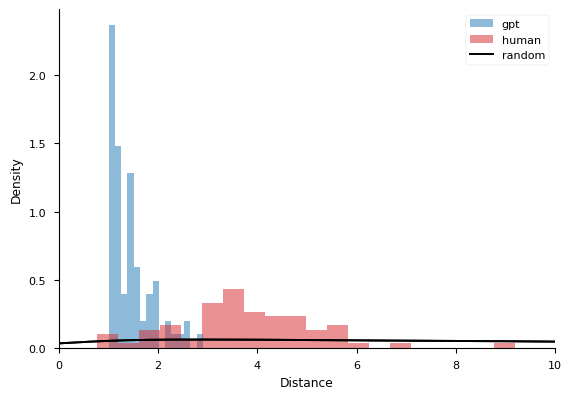

In [292]:
# 分别
# 绘制第一个直方图
#disdata = fulldata[fulldata.Edistance > -1]
x1 = disdata[disdata['agent'] == 'per_gpt']['Edistance']
x2 = disdata[disdata['agent'] == 'human']['Edistance']
# 计算数据的最小值和最大值
'''
min_val = min(min(x1), min(x2))
max_val = max(max(x1), max(x2))

# 生成一个整数间隔的列表
bins = list(range(min_val, max_val + 1))
'''
plt.hist(x1, bins=15, density=True,color=custom_colors[0],alpha=0.5, label='gpt')

# 绘制第二个直方图
# 计算数据的最小值和最大值
'''
min_val = min(min(x1), min(x2))
max_val = max(max(x1), max(x2))

# 生成一个整数间隔的列表
bins = list(range(min_val, max_val + 1))
'''
plt.hist(x2, bins=20, density=True,color=custom_colors[1],alpha=0.5, label='human')
x = randomdata['Edistance']
kde = gaussian_kde(x)
kde_x = np.linspace(0, 10, 1000)
kde_y = kde(kde_x)
plt.plot(kde_x, kde_y, color='black',label='random')
plt.xlim([0,10])
# random 的数据
ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
plt.legend()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(kde_x, kde_y, color='black',label='random walk')
plt.ylabel('Density')
plt.xlabel('Distance')
plt.show()

In [293]:
per_gptdata[['environment','horizons']].value_counts()

environment  horizons
smooth       10          352
rough        10          132
             5           126
smooth       5            90
Name: count, dtype: int64

### 奖励分析

In [15]:
per_rewards = per_gptdata.groupby(['agent','id','environment','t','trials'])['z'].mean().reset_index()
#per_rewards.to_csv('per_rewards.csv')
per_rewards

,agent,id,environment,t,trials,z
0,per_gpt,0,smooth,0.2,0,5.083712
1,per_gpt,0,smooth,0.2,1,16.885204
2,per_gpt,0,smooth,0.2,2,41.997935
3,per_gpt,0,smooth,0.2,3,61.184173
4,per_gpt,0,smooth,0.2,4,62.006522
...,...,...,...,...,...,...
4864,per_gpt,458,smooth,1.0,6,95.573272
4865,per_gpt,458,smooth,1.0,7,91.427816
4866,per_gpt,458,smooth,1.0,8,95.573272
4867,per_gpt,458,smooth,1.0,9,91.427816


In [5]:
reward_data = fulldata.groupby(['agent','id','environment','t'])['z'].mean().reset_index()
reward_data.to_csv('reward_data.csv')

In [7]:
randomdata = pd.read_csv('../model/random_walk.csv',index_col=0)
random_reward = randomdata.groupby(['trials','environment'])['z'].mean().reset_index()

In [8]:
random_reward.groupby('environment')['z'].mean()

environment
rough     50.318813
smooth    49.200050
Name: z, dtype: float64

In [298]:
fulldata 

,trials,x,z,z_scaled,kernel,globalmax,id,environment,horizons,agent,Edistance
0,0,15,23.628441,16,21,70,0,smooth,5,per_gpt,-1
1,1,14,13.343422,9,21,70,0,smooth,5,per_gpt,1
2,2,16,26.871527,19,21,70,0,smooth,5,per_gpt,2
3,3,17,27.568485,18,21,70,0,smooth,5,per_gpt,1
4,4,18,41.936505,31,21,70,0,smooth,5,per_gpt,1
...,...,...,...,...,...,...,...,...,...,...,...
5591,1,24,8.000000,11,30,79,86,smooth,5,human,8
5592,2,29,30.000000,29,30,79,86,smooth,5,human,5
5593,3,0,98.000000,82,30,79,86,smooth,5,human,29
5594,4,0,99.000000,83,30,79,86,smooth,5,human,0


<Axes: xlabel='trials', ylabel='z'>

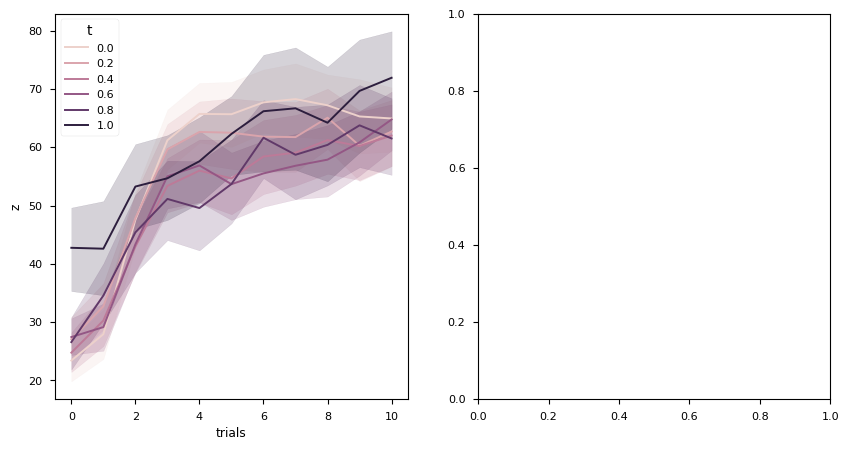

In [20]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.lineplot(data=per_rewards[per_rewards.environment == 'smooth'],x='trials',y='z',hue='t',ax=axes[0])

C:\Users\scy\AppData\Local\Temp\ipykernel_11656\187480886.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 40)` for the same effect.

  p1 = sns.lineplot(x='trials',y='z',data=avg_r,ax=ax[0],hue = 'agent',style='t',palette=custom_colors,ci=40)
C:\Users\scy\AppData\Local\Temp\ipykernel_11656\187480886.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 40)` for the same effect.

  p2 = sns.lineplot(x='trials',y='z',data=avg_s,ax=ax[1], hue='agent',style='horizons',palette=custom_colors,ci=40)


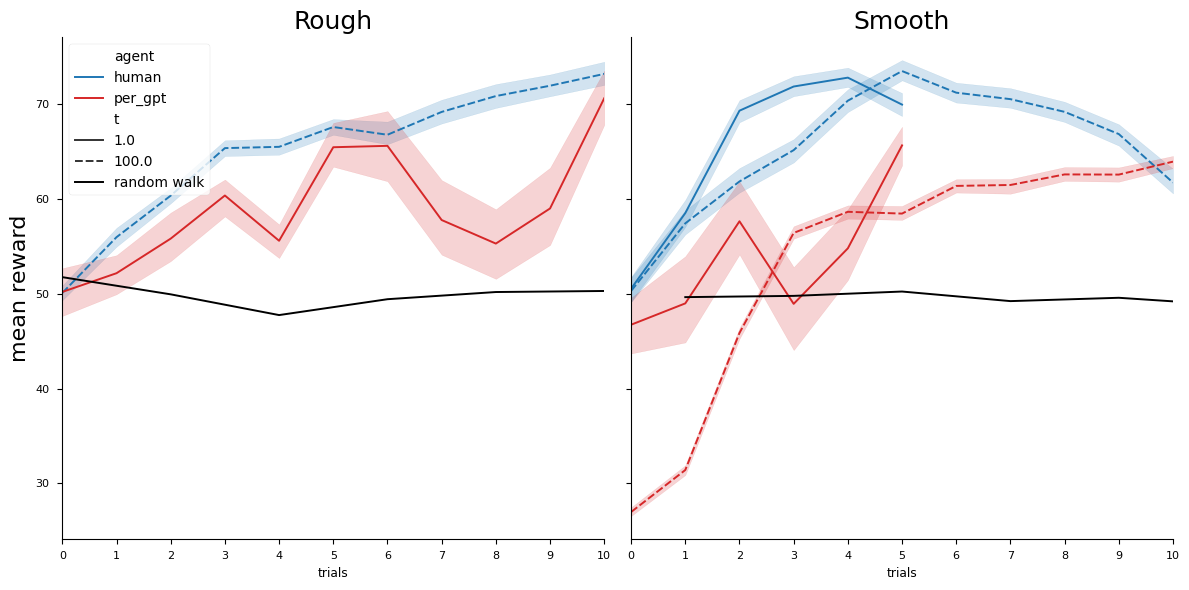

In [9]:
# 数据聚合
reward_data = fulldata.groupby(['agent','id','environment','x','trials','horizons','t'])['z'].mean().reset_index()
fig,ax = plt.subplots(1,2,figsize=(12,6),sharey=True)
avg_r = reward_data[reward_data['environment'] == 'rough']
avg_s = reward_data[reward_data['environment'] == 'smooth']

p1 = sns.lineplot(x='trials',y='z',data=avg_r,ax=ax[0],hue = 'agent',style='t',palette=custom_colors,ci=40)
p1.set_title('Rough',fontsize = 18)
p1.set_ylabel('mean reward',fontsize = 16)
ax[0].plot('z',color='black',data=random_reward[random_reward.environment == 'rough'],label='random walk')
p1.legend(loc='upper left',fontsize=10)
sns.despine(top=True)


p2 = sns.lineplot(x='trials',y='z',data=avg_s,ax=ax[1], hue='agent',style='horizons',palette=custom_colors,ci=40)
p2.set_title('Smooth',fontsize = 18)
p2.set_ylabel('mean reward')
ax[1].plot('z',color='black',data=random_reward[random_reward.environment == 'smooth'],label='random walk')

p2.legend().remove()
p1.set_xlim([0,10])
p2.set_xlim([0,10])
p1.set_xticks(np.arange(0,11))
p2.set_xticks(np.arange(0,11))
fig.tight_layout()